In [1]:
import pandas as pd

In [31]:
df = pd.read_csv('../data/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [35]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [44]:
# drop all rows with a NaN in the Price column, dropna(axis=1) would drop all columns with a NaN
df.dropna(subset=['Price'], inplace=True)

df.Car = df.Car.fillna(value=0)

df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].mean())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['YearBuilt'] = df['YearBuilt'].astype('Int32')
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize          9265
BuildingArea     16591
YearBuilt            0
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [75]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,0,202.0,NaN,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,0,94.0,NaN,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,0,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [76]:
df.loc[2, 'Rooms'] = 3 # change a single value in row 2, column Rooms
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,0,202.0,NaN,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,0,94.0,NaN,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,0,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [91]:
# change existing column or create a new column
df['Price Class'] = df['Price'].apply(lambda x: 'High' if x > 1500000 else 'Low')

#import numpy as np
#df['Price Class'] = np.where(df['Price'] > 1500000, 'High', 'Low')

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price Class
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,0,202.0,NaN,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Low
2,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Low
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Low
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,0,94.0,NaN,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,Low
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,0,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,High


In [99]:
df[['Price', 'Rooms', 'YearBuilt']].corr()


,Price,Rooms,YearBuilt
Price,1.000000,0.465247,-0.234329
Rooms,0.465247,1.000000,-0.005845
YearBuilt,-0.234329,-0.005845,1.000000


<Axes: >

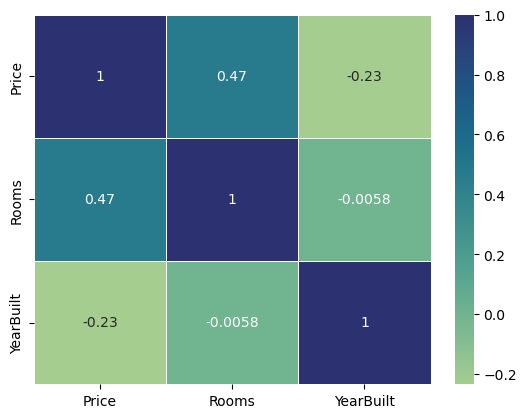

In [100]:
import seaborn as sns
sns.heatmap(df[['Price', 'Rooms', 'YearBuilt']].corr(), cmap="crest", annot=True, linewidth=.5)